### SVP placez le fichier house_data.csv au même niveau que le notebook

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn import linear_model
from sklearn import neighbors

In [2]:
df=pd.read_csv("house_data.csv")
df.dropna(inplace=True)
df.head()

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


In [3]:
df.describe(include="all")

,price,surface,arrondissement
count,822.000000,822.000000,822.000000
mean,2010.306569,58.045925,4.142336
std,1895.091794,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1052.500000,28.655000,2.000000
50%,1564.500000,46.100000,3.000000
75%,2348.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000


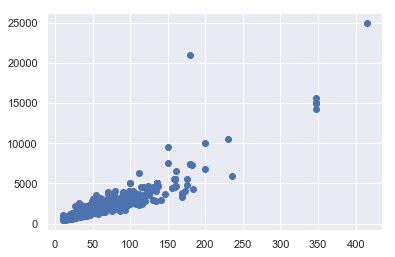

In [4]:
plt.scatter(df.surface,df.price)

In [5]:
df=df[df.price<7000]

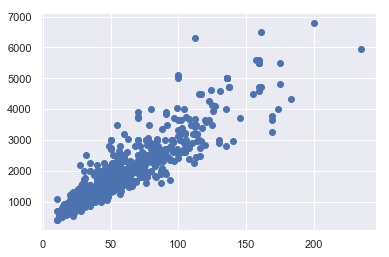

In [6]:
plt.scatter(df.surface,df.price)

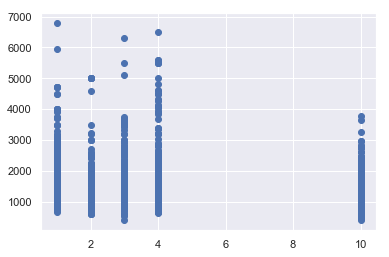

In [7]:
plt.scatter(df.arrondissement,df.price)

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(df[["surface","arrondissement"]],df.price,test_size=0.2)

## BASELINE: univariate linear regression

In [9]:
regr_univariate = linear_model.LinearRegression()
regr_univariate.fit(Xtrain.surface.values.reshape(-1,1), ytrain)
print("BASELINE QUADRATIC PREDICTION SCORE:",regr_univariate.score(Xtest.surface.values.reshape(-1,1),ytest))

BASELINE QUADRATIC PREDICTION SCORE: 0.8330934935312264


In [10]:
print("theta univariate:",regr_univariate.intercept_,regr_univariate.coef_[0])

theta univariate: 317.93094866325487 27.481432461629698


## 1st IMPROVEMENT: bivariate linear regression

### 1. With sklearn

In [11]:
regr_bivariate = linear_model.LinearRegression()
regr_bivariate.fit(Xtrain.values,ytrain)
print("1ST IMPROVEMENT QUADRATIC PREDICTION SCORE:",regr_bivariate.score(Xtest.values,ytest))

1ST IMPROVEMENT QUADRATIC PREDICTION SCORE: 0.8597108520759261


In [12]:
print("theta bivariate:",regr_bivariate.intercept_,regr_bivariate.coef_[0], regr_bivariate.coef_[1])

theta bivariate: 549.6629030706861 27.0234110262144 -49.36911441721024


### 2. With the direct analytic solution

In [13]:
#1st IMPROVEMENT: bivariate linear regression analytic method
Xreg=Xtrain.copy()
Xreg.insert(0,"ones",1)
theta=np.linalg.inv(Xreg.T.dot(Xreg)).dot(Xreg.T).dot(ytrain)
print("theta analytic bivariate:", theta)

theta analytic bivariate: [549.66290307  27.02341103 -49.36911442]


## 2nd improvement: k-nn method

In [14]:
#search for best number of neighbors
score=[]
for i in range(1,30):
    knn=neighbors.KNeighborsRegressor(i)
    knn.fit(Xtrain.values,ytrain)
    score.append(knn.score(Xtest.values,ytest))

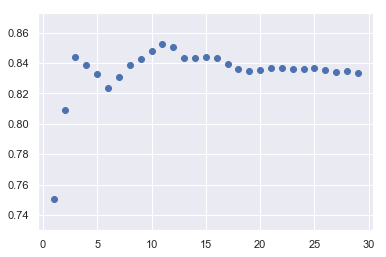

In [15]:
plt.scatter(range(1,30),score)

In [16]:
#2nd IMPROVEMENT score
knn=neighbors.KNeighborsRegressor(score.index(max(score))+1)
knn.fit(Xtrain.values,ytrain)
print("2nd IMPROVEMENT QUADRATIC PREDICTION SCORE:",knn.score(Xtest.values,ytest))

2nd IMPROVEMENT QUADRATIC PREDICTION SCORE: 0.8526806663374626


### La regression linéaire bivariée à partir des variables "surface" et "arrondissement" donne une plus faible erreur quadratique c'est donc cette méthode qu'on choisit parmi les trois testées